En este script, se compara los rendimientos generados por los distintos modelos entrenados anteriormente.

Primero, se importan las librerías necesarias

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

Se definen los directorios que se van a emplear

In [7]:
ROOT_DIR = Path.cwd()
RESULTS_DIR = ROOT_DIR / "validation_results"

In [13]:
df_metrics = pd.read_csv(RESULTS_DIR / "metrics_comparison.csv")
df_metrics.sort_values(by="mAP@50-95", ascending=False, inplace=True)

df_metrics

,Modelo,Precision,Recall,F1-Score,mAP@50,mAP@50-95
0,yolov8x.pt,0.722,0.683,0.702,0.805,0.617
1,yolov8l.pt,0.734,0.660,0.695,0.794,0.617
2,yolov8m.pt,0.688,0.665,0.677,0.777,0.596
3,yolov8s.pt,0.693,0.608,0.648,0.694,0.537
4,yolov8n.pt,0.713,0.553,0.623,0.624,0.456


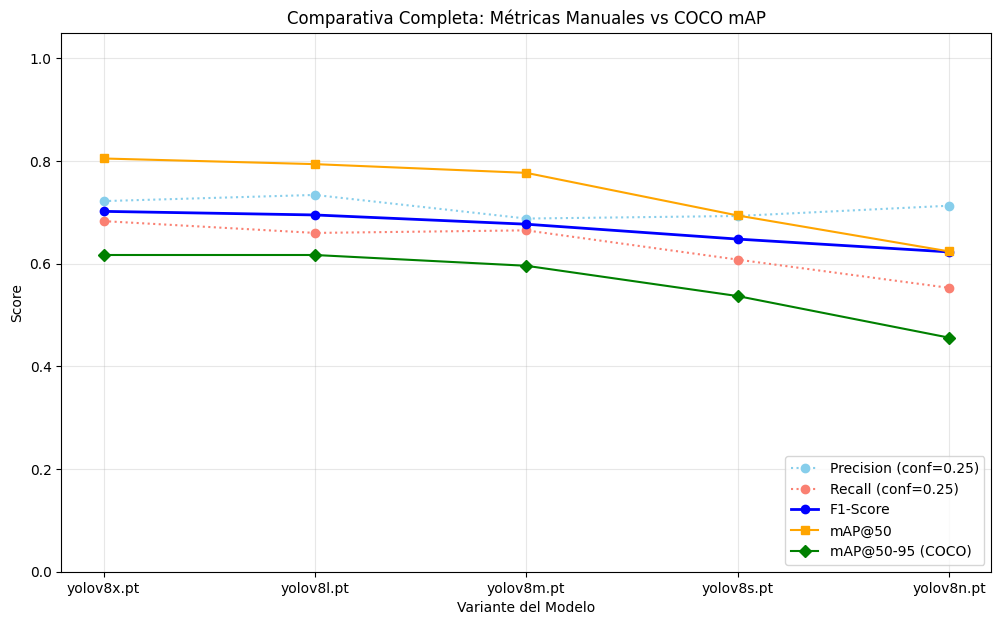

In [14]:
# Métricas Manuales (Líneas punteadas)
plt.figure(figsize=(12, 7))

plt.plot(df_metrics['Modelo'], df_metrics['Precision'], marker='o', linestyle=':', color='skyblue', label='Precision (conf=0.25)')
plt.plot(df_metrics['Modelo'], df_metrics['Recall'], marker='o', linestyle=':', color='salmon', label='Recall (conf=0.25)')
plt.plot(df_metrics['Modelo'], df_metrics['F1-Score'], marker='o', linestyle='-', linewidth=2, color='blue', label='F1-Score')

# Métricas mAP (Líneas sólidas gruesas)
plt.plot(df_metrics['Modelo'], df_metrics['mAP@50'], marker='s', linestyle='-', color='orange', label='mAP@50')
plt.plot(df_metrics['Modelo'], df_metrics['mAP@50-95'], marker='D', linestyle='-', color='green', label='mAP@50-95 (COCO)')
plt.title('Comparativa Completa: Métricas Manuales vs COCO mAP')
plt.xlabel('Variante del Modelo')
plt.ylabel('Score')
plt.legend(loc='lower right', frameon=True)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05) # Fijar eje Y de 0 a 1
plt.show()

<Figure size 1200x600 with 0 Axes>

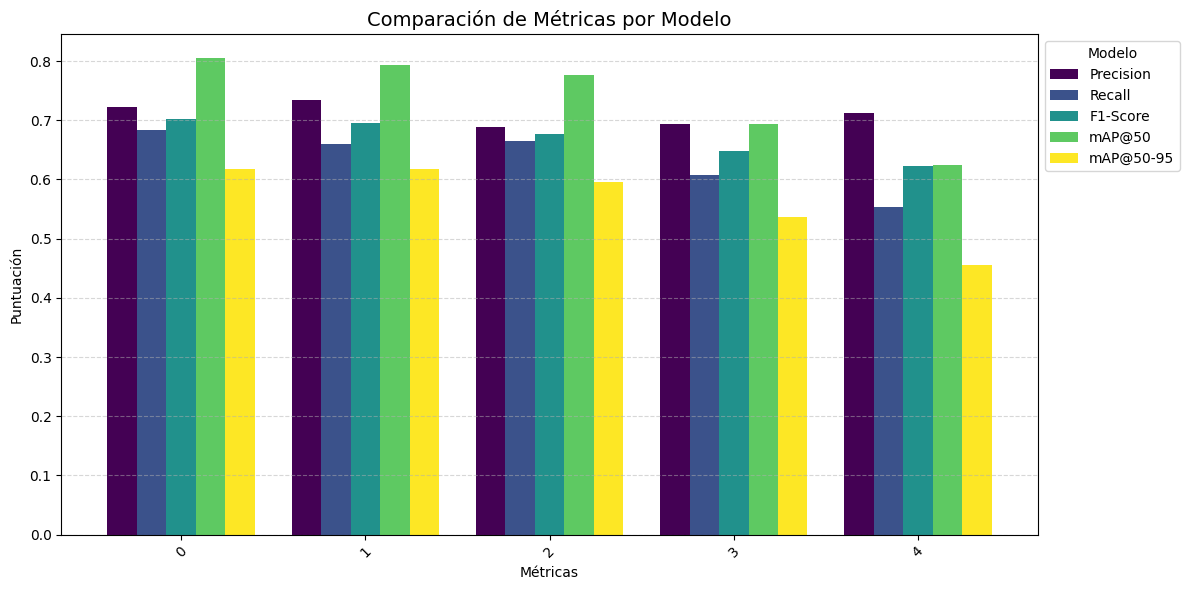

In [11]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
# Transponemos metrics directamente para el plot
df_metrics.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='viridis')

plt.title('Comparación de Métricas por Modelo', fontsize=14)
plt.ylabel('Puntuación')
plt.xlabel('Métricas')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Modelo')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
